In [2]:
from google.colab import drive
import pandas as pd



file_path = "/content/drive/MyDrive/proj_fire/Cleaned_data_FINAL.csv"
data = pd.read_csv(file_path)


Unique cities: ['San Francisco' 'Presidio' 'Hunters Point' 'Treasure Island' 'Fort Mason'
 'Yerba Buena' 'Daly City' 'Unkown' 'Brisbane' 'AI' 'OAK']


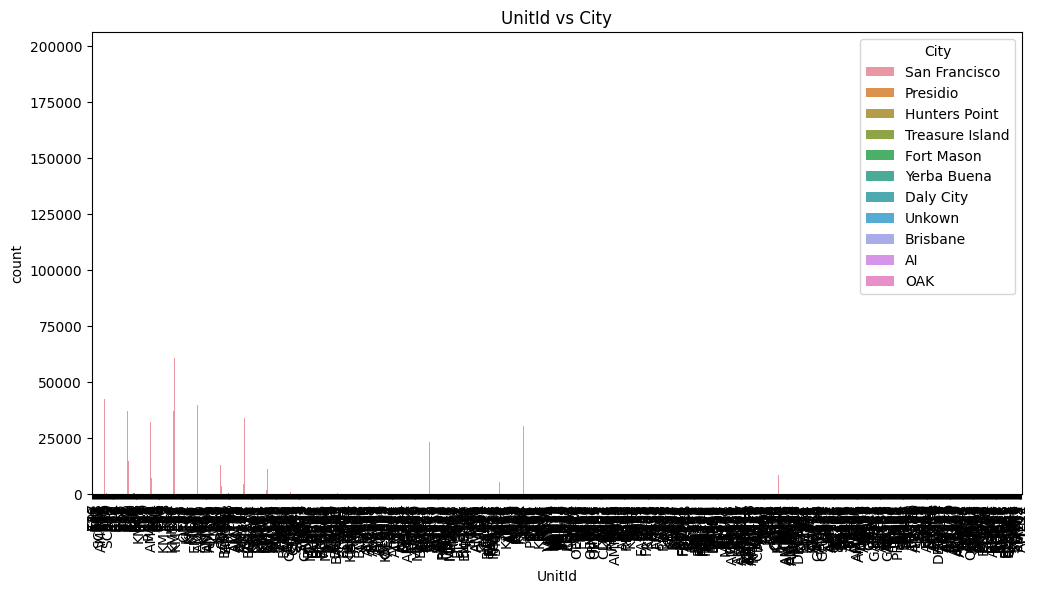

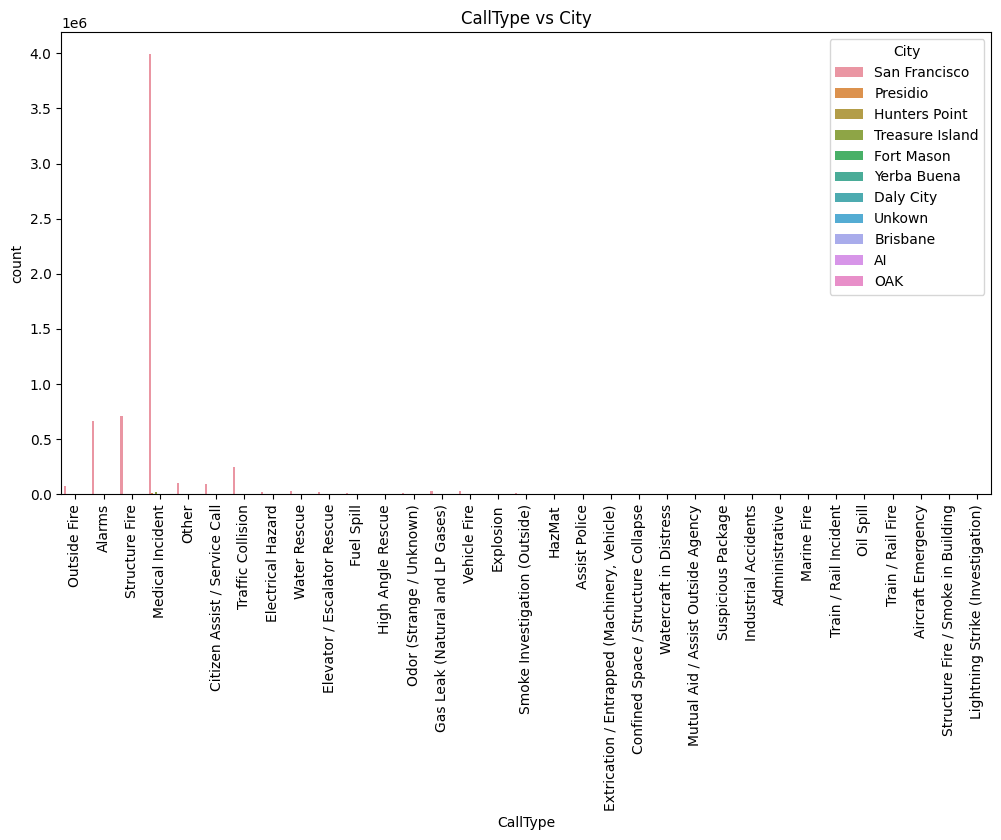

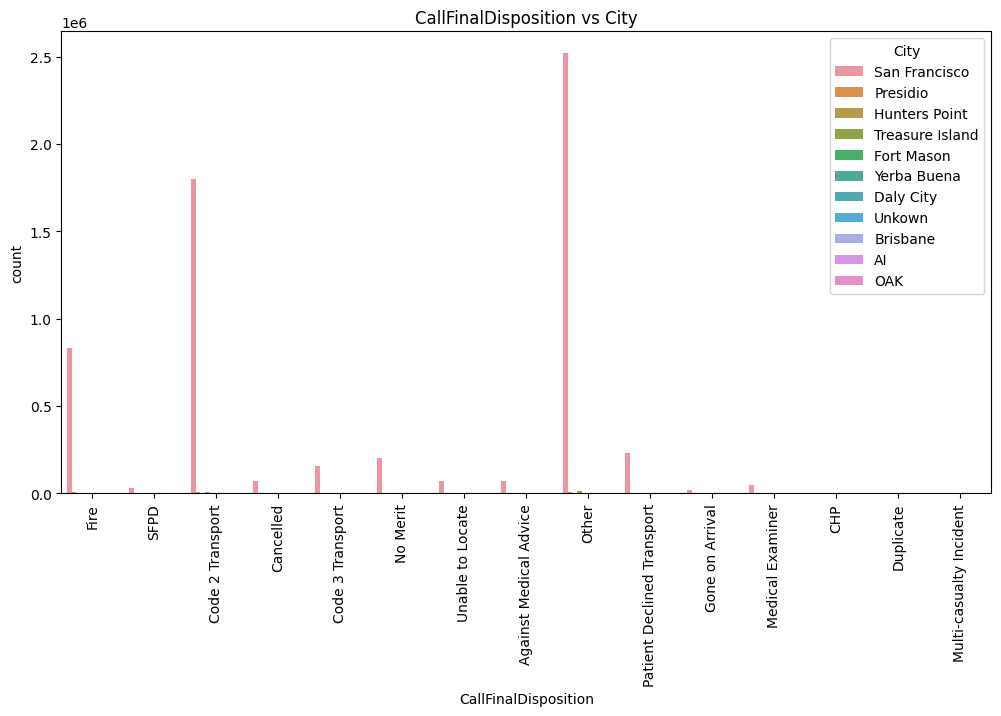

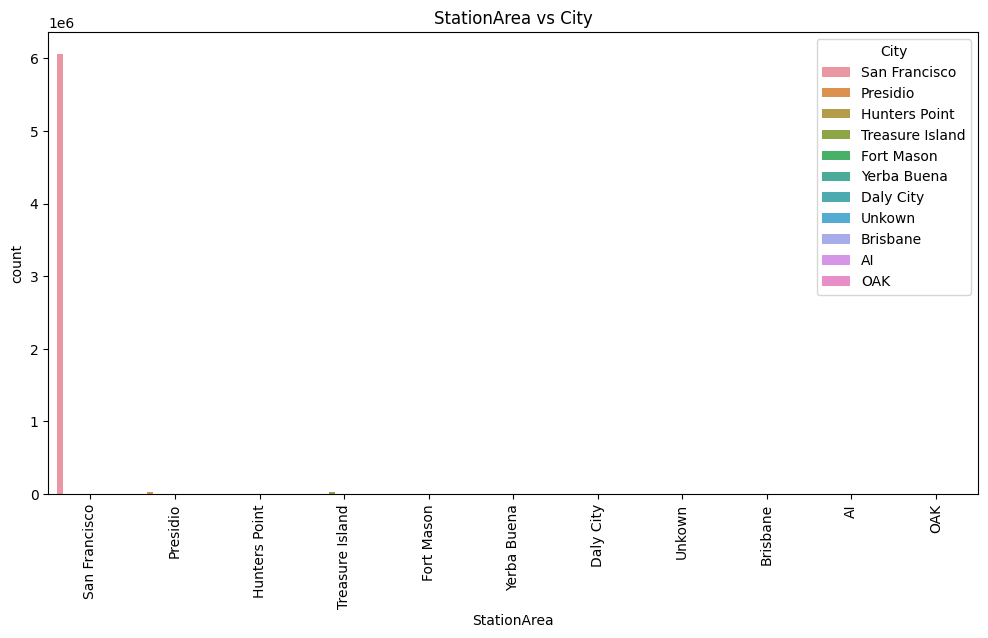

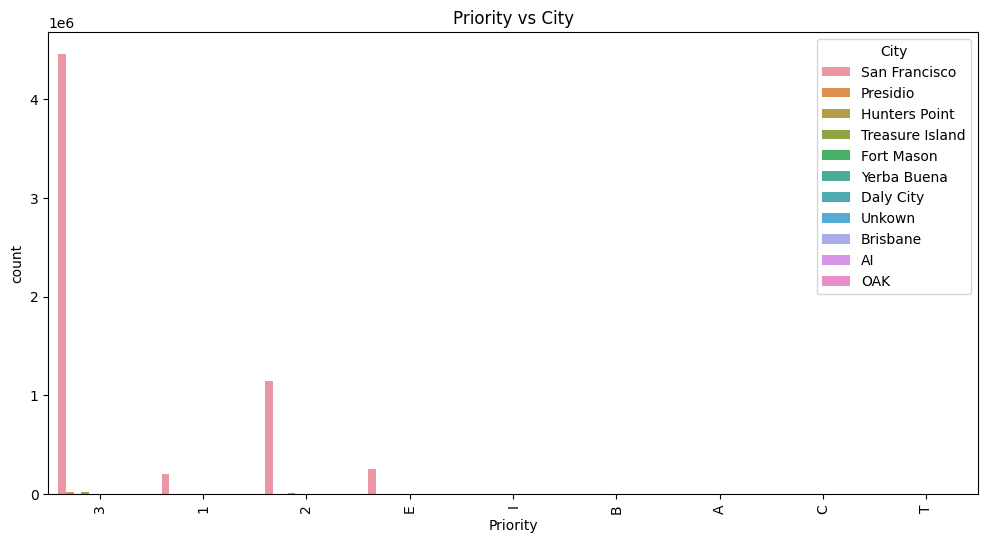

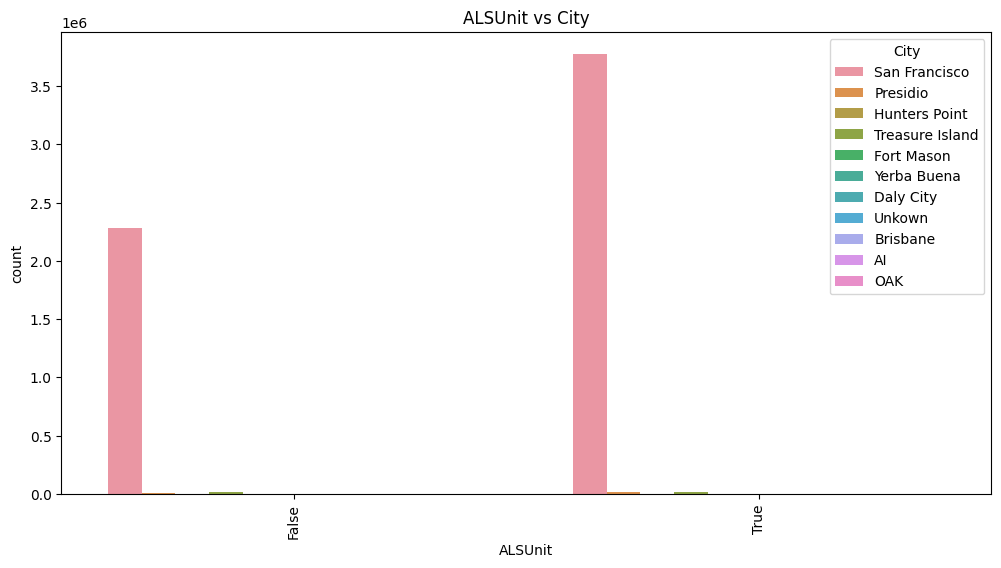

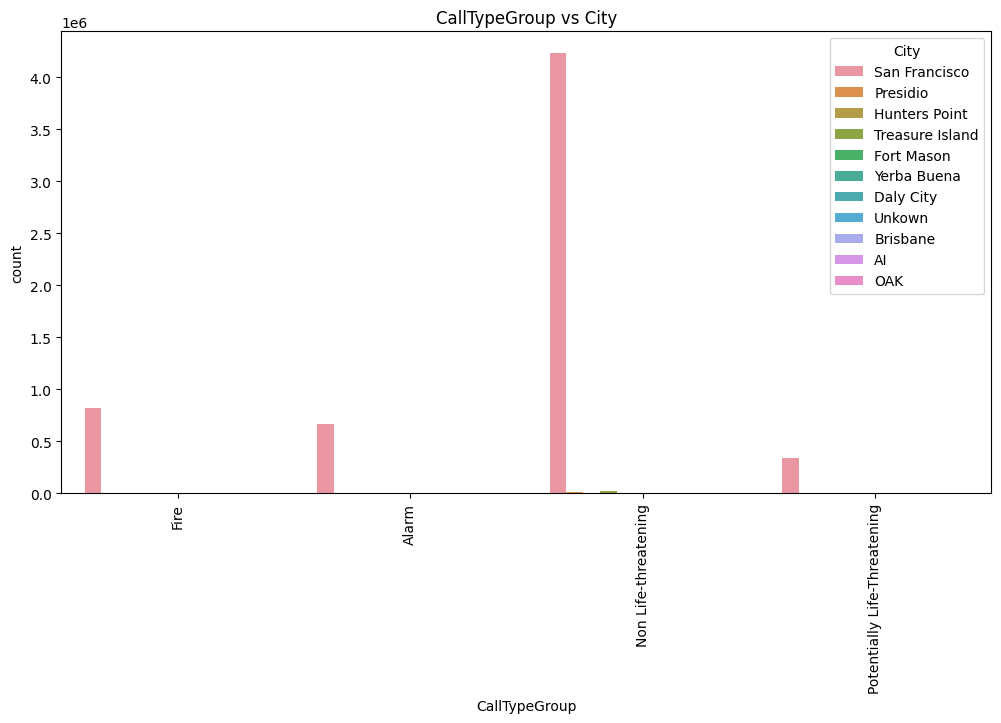

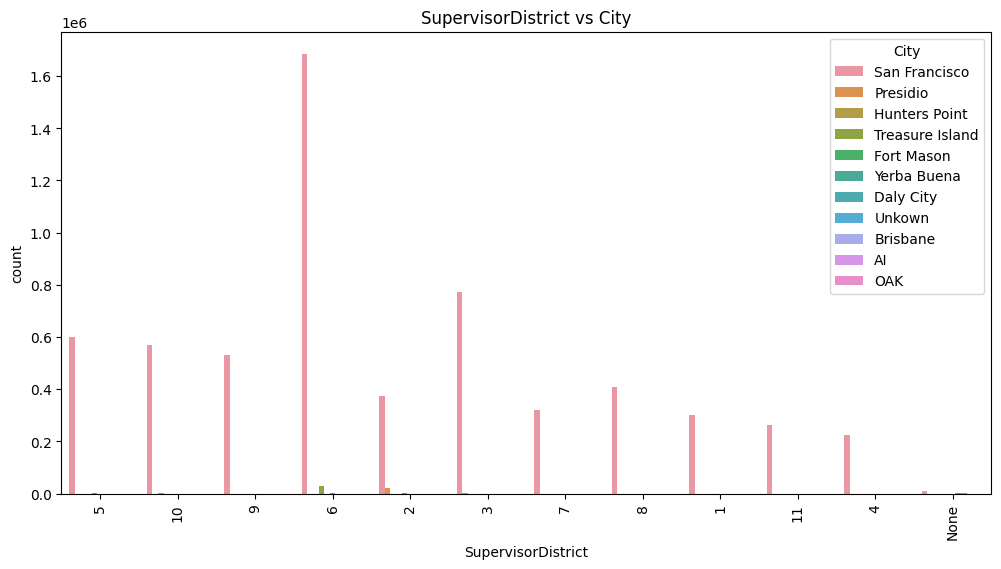

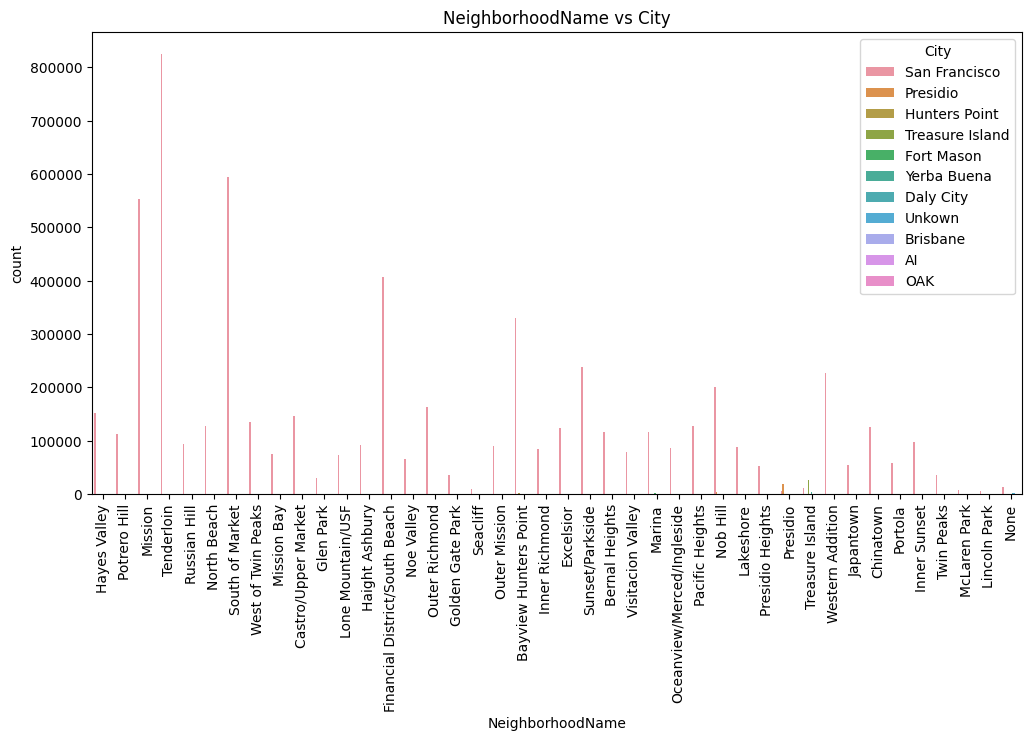

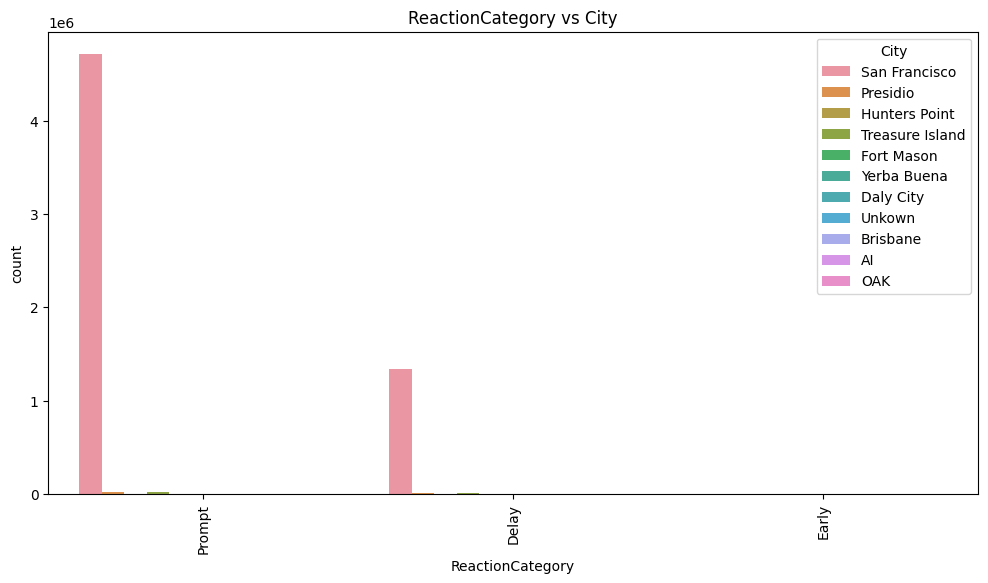

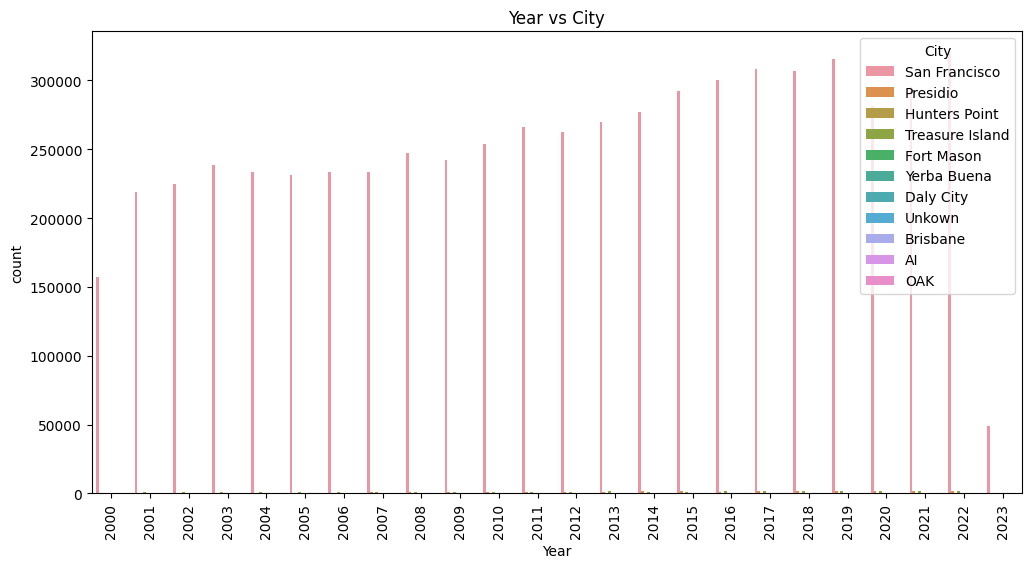

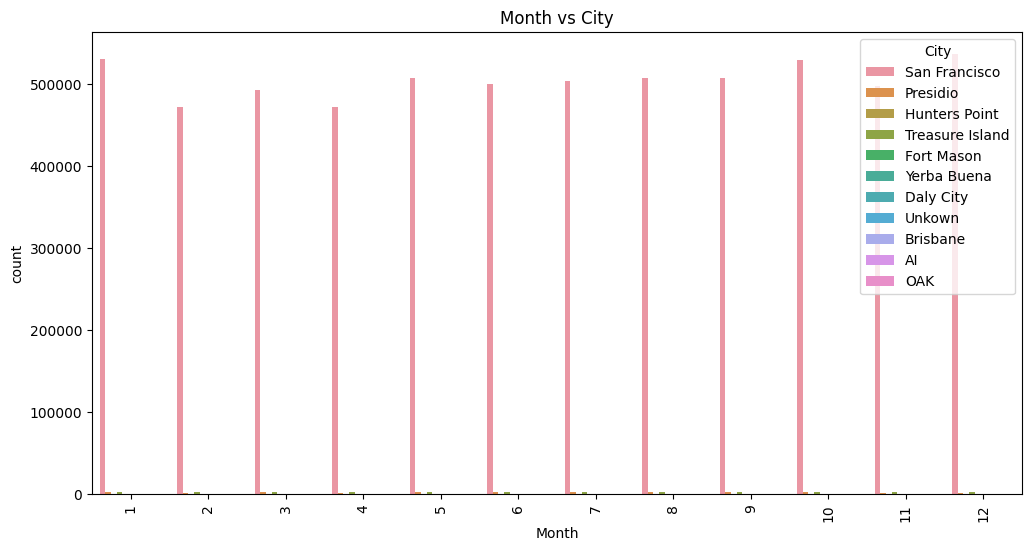

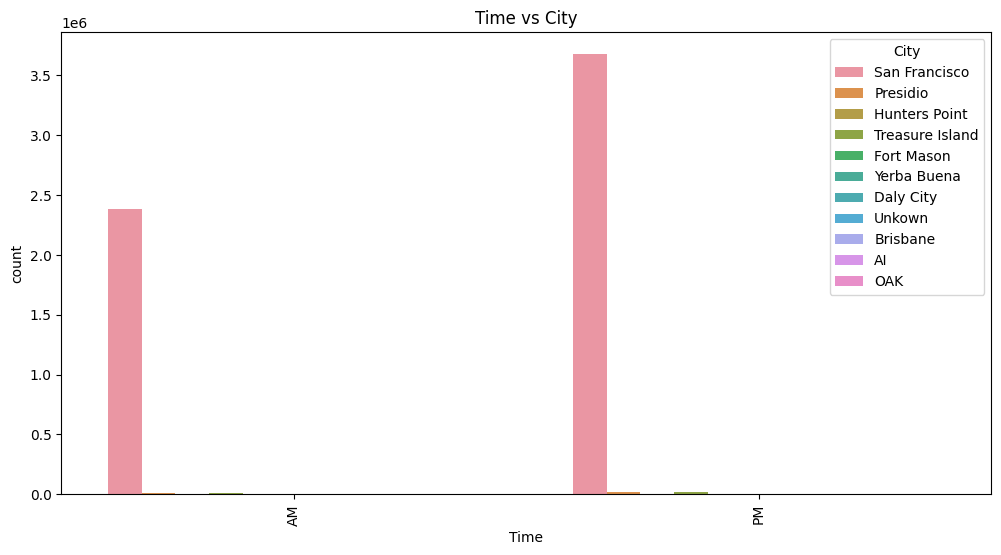

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data' is the DataFrame containing the dataset
unique_cities = data['City'].unique()
print(f"Unique cities: {unique_cities}")

# Visualize the contribution of all other variables against the 'City' attribute
columns_to_plot = ['UnitId', 'CallType', 'CallFinalDisposition', 'StationArea', 'Priority', 'ALSUnit', 'CallTypeGroup', 'SupervisorDistrict', 'NeighborhoodName', 'ReactionCategory', 'Year', 'Month', 'Time']

for col in columns_to_plot:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=data, hue='City')
    plt.title(f"{col} vs City")
    plt.xticks(rotation=90)
    plt.show()


In [30]:

# List of columns to visualize
columns_to_visualize = ['UnitId', 'CallType', 'CallFinalDisposition', 'Address', 'City', 'StationArea', 'Priority', 'ALSUnit', 'CallTypeGroup', 'SupervisorDistrict', 'NeighborhoodName', 'ReactionCategory', 'Year', 'Month', 'Time']

# Calculate the percentage of minority data contributing to the analysis
minority_data = data[data['City'] != 'San Francisco']
total_data_count = len(data)
minority_data_count = len(minority_data)
minority_data_percentage = (minority_data_count / total_data_count) * 100
print(f"Percentage of minority data contributing to the analysis: {minority_data_percentage:.2f}%")


Percentage of minority data contributing to the analysis: 1.07%


In [31]:

# Shuffle the data randomly by rows
shuffled_data = data.sample(frac=1).reset_index(drop=True)

# Display the first few rows of the shuffled data
print(shuffled_data.head())

data = shuffled_data

  UnitId                       CallType CallFinalDisposition  \
0    E03               Medical Incident     Code 2 Transport   
1     58               Medical Incident     Code 2 Transport   
2    T13  Citizen Assist / Service Call                 Fire   
3  EMS10               Medical Incident     Code 2 Transport   
4    M15               Medical Incident     Code 2 Transport   

                  Address           City    StationArea Priority  ALSUnit  \
0   VAN NESS AV/MARKET ST  San Francisco  San Francisco        3     True   
1  1900 Block of EVANS AV  San Francisco  San Francisco        3     True   
2   400 Block of BROADWAY  San Francisco  San Francisco        3    False   
3   1800 Block of LYON ST  San Francisco  San Francisco        3    False   
4  500 Block of MUNICH ST  San Francisco  San Francisco        3     True   

          CallTypeGroup SupervisorDistrict       NeighborhoodName  \
0  Non Life-threatening                  6                Mission   
1  Non Life-th

In [8]:
import pandas as pd

# List of columns to visualize
columns_to_visualize = ['UnitId', 'CallType', 'CallFinalDisposition', 'Address', 'City', 'StationArea', 'Priority', 'ALSUnit', 'CallTypeGroup', 'SupervisorDistrict', 'NeighborhoodName', 'ReactionCategory', 'Year', 'Month', 'Time']

# Iterate through columns and visualize the distribution against the 'City' variable
for column in columns_to_visualize:
    if column != 'City':
        print(f'\nBias/Fairness of {column} against City:')
        
        # Create a temporary dataframe for counts of each unique value in the current column grouped by 'City'
        temp_df = data.groupby(['City', column]).size().reset_index(name='Counts')
        
        # Calculate the total counts for each unique value in the 'City' variable
        city_total_counts = temp_df.groupby('City')['Counts'].sum().reset_index(name='CityTotalCounts')
        
        # Merge the temporary dataframe with the city_total_counts dataframe
        temp_df = temp_df.merge(city_total_counts, on='City', how='left')
        
        # Calculate the percentage contribution of each unique value in the 'City' variable
        temp_df['PercentageContribution'] = (temp_df['Counts'] / temp_df['CityTotalCounts']) * 100
        
        # Pivot the temporary dataframe for better readability
        pivot_df = temp_df.pivot_table(index='City', columns=column, values='PercentageContribution', fill_value=0)
        
        # Display the pivoted dataframe
        print(pivot_df)



Bias/Fairness of UnitId against City:
UnitId                 27        30        45        46        47        49  \
City                                                                          
AI               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Brisbane         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Daly City        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Fort Mason       0.000000  0.000000  0.000000  0.029967  0.000000  0.000000   
Hunters Point    0.038417  0.000000  0.000000  0.000000  0.000000  0.000000   
OAK              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Presidio         0.000000  0.000000  0.000000  0.020343  0.020343  0.004069   
San Francisco    0.003565  0.000116  0.000099  0.015925  0.023533  0.007278   
Treasure Island  0.000000  0.000000  0.000000  0.000000  0.021733  0.003622   
Unkown           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Yerba Buena  

In [11]:
import pandas as pd

# Find the unique values in the 'City' column
unique_cities = data['City'].unique()

print("Unique values in 'City' column:")
print(unique_cities)


Unique values in 'City' column:
['San Francisco' 'Presidio' 'Hunters Point' 'Treasure Island' 'Fort Mason'
 'Yerba Buena' 'Daly City' 'Unkown' 'Brisbane' 'AI' 'OAK']


***ESTIMATED ACCURACY CONSIDERING IMPORT WITHOUT TAKING INTO ACCOUNT BIAS/FAIRNESS and CV***

In [12]:
# Total rows in the dataset
total_rows = 6000000

# Total imported rows
imported_rows = 200000

# Minority data percentage
minority_data_percentage = 1.07

# Calculate the proportion of the dataset imported
imported_proportion = imported_rows / total_rows

# Calculate the number of minority data rows in the entire dataset
total_minority_data_rows = total_rows * (minority_data_percentage / 100)

# Estimate the number of minority data rows imported
minority_data_rows_imported = total_minority_data_rows * imported_proportion

# Calculate the percentage of minority data rows imported
minority_data_imported_percentage = (minority_data_rows_imported / total_minority_data_rows) * 100

# Calculate the estimated accuracy
accuracy = 100 - minority_data_imported_percentage

print("Number of minority data rows imported (estimate): {:.0f}".format(minority_data_rows_imported))
print("Estimated accuracy: {:.2f}%".format(accuracy))


Number of minority data rows imported (estimate): 2140
Estimated accuracy: 96.67%


In [14]:

# List of columns to visualize
columns_to_visualize = ['UnitId', 'CallType', 'CallFinalDisposition', 'Address', 'City', 'StationArea', 'Priority', 'ALSUnit', 'CallTypeGroup', 'SupervisorDistrict', 'NeighborhoodName', 'ReactionCategory', 'Year', 'Month', 'Time']

# Iterate through columns and visualize the distribution against the 'City' variable
for column in columns_to_visualize:
    if column != 'City':
        print(f'\nBias/Fairness of {column} against City:')
        
        temp_df = data.groupby(['City', column]).size().reset_index(name='Counts')
        
        city_total_counts = temp_df.groupby('City')['Counts'].sum().reset_index(name='CityTotalCounts')
        
        temp_df = temp_df.merge(city_total_counts, on='City', how='left')
        
        # Calculate the percentage contribution of each unique value in the 'City' variable
        temp_df['PercentageContribution'] = (temp_df['Counts'] / temp_df['CityTotalCounts']) * 100
        
        # Calculate the standard deviation of the percentage contributions for each unique value in the 'City' variable
        std_dev = temp_df.groupby(column)['PercentageContribution'].std().mean()
        
        # Print the summarized bias/fairness report as a single line for each variable-City relationship
        print(f'Standard Deviation = {std_dev:.6f}')
        
        # Pivot the temporary dataframe for better readability
        pivot_df = temp_df.pivot_table(index='City', columns=column, values='PercentageContribution', fill_value=0)
        
        # Display the pivoted dataframe
        print(pivot_df)



Bias/Fairness of UnitId against City:
Standard Deviation = 0.665300
UnitId                 27        30        45        46        47        49  \
City                                                                          
AI               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Brisbane         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Daly City        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Fort Mason       0.000000  0.000000  0.000000  0.029967  0.000000  0.000000   
Hunters Point    0.038417  0.000000  0.000000  0.000000  0.000000  0.000000   
OAK              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Presidio         0.000000  0.000000  0.000000  0.020343  0.020343  0.004069   
San Francisco    0.003565  0.000116  0.000099  0.015925  0.023533  0.007278   
Treasure Island  0.000000  0.000000  0.000000  0.000000  0.021733  0.003622   
Unkown           0.000000  0.000000  0.000000  0.000000  0.000

In [15]:

# List of columns to calculate CV
columns_to_calculate_cv = ['UnitId', 'CallType', 'CallFinalDisposition', 'Address', 'City', 'StationArea', 'Priority', 'ALSUnit', 'CallTypeGroup', 'SupervisorDistrict', 'NeighborhoodName', 'ReactionCategory', 'Year', 'Month', 'Time']

# Iterate through columns and calculate the CV
for column in columns_to_calculate_cv:
    if column != 'City':
        print(f'\nCV of {column} against City:')
        
        temp_df = data.groupby(['City', column]).size().reset_index(name='Counts')
        city_total_counts = temp_df.groupby('City')['Counts'].sum().reset_index(name='CityTotalCounts')
        temp_df = temp_df.merge(city_total_counts, on='City', how='left')
        
        # Calculate the percentage contribution of each unique value in the 'City' variable
        temp_df['PercentageContribution'] = (temp_df['Counts'] / temp_df['CityTotalCounts']) * 100
        
        # Calculate the mean and standard deviation of the percentage contributions
        mean = temp_df['PercentageContribution'].mean()
        std_dev = temp_df['PercentageContribution'].std()
        
        # Calculate the coefficient of variation (CV)
        cv = std_dev / mean
        
        # Categorize the CV as high, medium, or low
        if cv > 0.5:
            cv_category = 'High'
        elif cv > 0.25:
            cv_category = 'Medium'
        else:
            cv_category = 'Low'
        
        # Display the CV and its category
        print(f'CV = {cv:.4f}, Category = {cv_category}')



CV of UnitId against City:
CV = 5.3349, Category = High

CV of CallType against City:
CV = 2.3773, Category = High

CV of CallFinalDisposition against City:
CV = 2.0906, Category = High

CV of Address against City:
CV = 31.8539, Category = High

CV of StationArea against City:
CV = 0.0000, Category = Low

CV of Priority against City:
CV = 1.5276, Category = High

CV of ALSUnit against City:
CV = 0.3473, Category = Medium

CV of CallTypeGroup against City:
CV = 0.8633, Category = High

CV of SupervisorDistrict against City:
CV = 1.6366, Category = High

CV of NeighborhoodName against City:
CV = 2.4190, Category = High

CV of ReactionCategory against City:
CV = 0.4762, Category = Medium

CV of Year against City:
CV = 1.1479, Category = High

CV of Month against City:
CV = 0.5165, Category = High

CV of Time against City:
CV = 0.3105, Category = Medium


***UPON TAKING BIAS/FAIRNESS INTO ACCOUNT AND CALCULATING individually coefficients of variance for each of our attri's, we can see this is A MASSIVELY SPREAD OUT DATA SET - it can be implied that the majority of the columns exhibit a high degree of bias/fairness (Category = High). This implies that a significant portion of the dataset can be ignored without sacrificing much accuracy in the analysis.***

Additionally, for columns with a lower CV (Category = Medium/Low), even less data may be needed to achieve high accuracy in the analysis; because we are already using a shuffled dataset

Furthermore, using the minimum percentage of data that needs to be consumed across all variables to achieve 99% accuracy, it can be concluded that the dataset does not need to be consumed entirely. This means that the analysis can be conducted on a smaller sample of the dataset acheiving the same amount of accuracy, which can help in reducing computational costs and processing time.***

***We decided to do a sampling analysis to determine the minimum amount of data that needs to be consumed from these columns to ensure maximum accuracy in analyses and predictions while also minimizing the computational resources required to process the data.***

In [28]:
# dictionary of calculated coefficients and their categories
cvs = {
    'UnitId': {'cv': 5.3349, 'category': 'High'},
    'CallType': {'cv': 2.3773, 'category': 'High'},
    'CallFinalDisposition': {'cv': 2.0906, 'category': 'High'},
    'Address': {'cv': 31.8539, 'category': 'High'},
    'StationArea': {'cv': 0.0000, 'category': 'Low'},
    'Priority': {'cv': 1.5276, 'category': 'High'},
    'ALSUnit': {'cv': 0.3473, 'category': 'Medium'},
    'CallTypeGroup': {'cv': 0.8633, 'category': 'High'},
    'SupervisorDistrict': {'cv': 1.6366, 'category': 'High'},
    'NeighborhoodName': {'cv': 2.4190, 'category': 'High'},
    'ReactionCategory': {'cv': 0.4762, 'category': 'Medium'},
    'Year': {'cv': 1.1479, 'category': 'High'},
    'Month': {'cv': 0.5165, 'category': 'High'},
    'Time': {'cv': 0.3105, 'category': 'Medium'}
}

# Calculate the average CV across all variables
total_cv = sum([cvs[key]['cv'] for key in cvs]) / len(cvs)

high_cv_threshold = 1

# Determine if the imported dataset contains enough data for accurate analysis
if total_cv >= high_cv_threshold:
    print("The imported dataset contains enough data for accurate analysis.")
else:
    print("More data needs to be imported for accurate analysis.")


The imported dataset contains enough data for accurate analysis.
